In [27]:
import os
import json
from typing import Dict, List, Optional, Union, cast
import requests
import pandas as pd
import bamboolib as bam

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression 

#statistical tests
from scipy import stats
from scipy.stats import pearsonr, spearmanr

from math import sqrt
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from bs4 import BeautifulSoup
import plotly.express as px

#imports to show interactive visuals on github
import plotly.io as pio

import math
from math import sqrt
from reliability.Distributions import Weibull_Distribution

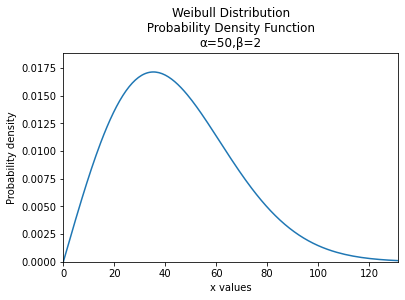

In [4]:
dist = Weibull_Distribution(alpha=50, beta=2)  # this created the distribution object
dist.PDF()  # this creates the plot of the PDF
plt.show()

In [9]:
from scipy import stats
import numpy as np

In [10]:
n_trials = 100
p = .02

bcars = stats.binom(n_trials,p)

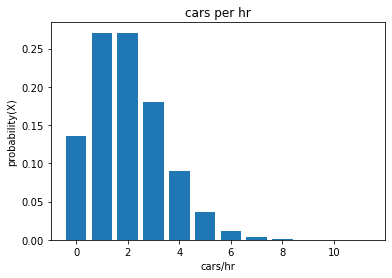

In [14]:
x = np.arange(0,12)
y = stats.poisson(2).pmf(x)

plt.bar(x,y)
plt.xlabel('cars/hr')
plt.ylabel('probability(X)')
plt.title('cars per hr');

# NLP

In [18]:
# We don't need to install nltk, it should come with anaconda, but nltk
# does need to download some data.
nltk.download('stopwords')
from requests import get
from bs4 import BeautifulSoup
import os

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/albertcontreras/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def basic_clean(string):
    string = unicodedata.normalize('NFKD', string)\
        .encode('ascii', 'ignore')\
        .decode('utf-8', 'ignore')\
        .lower()
    string = re.sub(r"[^a-z0-9'\s]", '', string)                                
    return string
def tokenize(string):
    #define tokenizer
    tokenizer = nltk.tokenize.ToktokTokenizer()
    # apply tokenization to the string.
    string = tokenizer.tokenize(string, return_str= True)
    #return tokenized string.
    return string
def stem(string) :
    """This function returns a string in stemmed format."""
    # create our stemming
    ps = nltk.porter.PorterStemmer()
    # split by the default
    stem = [ps.stem(word) for word in string.split()]
    # return to normal
    string = ' '.join(stem)
    return string
def lemmatize(string):
    """This function returns a string with words lemmatized"""
    # create our lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    # use a list. comprehension to lemmatize each word
    # string.split() => output a list of every token inside of the document
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    # glue the lemmas back together by the strings we split on
    string_lemmatize = ' '.join(lemmas)
    #return the altered document
    return string_lemmatize
def remove_stopwords (string, extra_words = [], exclude_words = []):
    "This function takes in a string, optional extra_words and exclude_words parameters"
    # assian our stoowords from nltk into stooword list
    stopword_list = stopwords.words('english')
    # utilizing set casting, i will remove any excluded stopwords
    stopword_list = set(stopword_list) - set(exclude_words)
    # add in any extra words to my stopwords set using a union
    stopword_list = stopword_list.union(set(extra_words))
    #split document by spaces
    words = string.split()
    # every word in our document, as long as that word is not in our stopwords
    filtered_words = [word for word in words if word not in stopword_list]
    # glue it back together with spaces, as it was so it shall be
    string_without_stopwords =' '.join(filtered_words)
    # return the document back
    return string_without_stopwords

In [20]:
def prep_TO_data(df, column, extra_words = [], exclude_words = []):
                        """This function take in a df and the string name for a text column with
                        option to pass lists for extra words and exclude words and
                        returns a df with the text article title, original text, stemmed text,
                        lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed."""
                        df['clean'] = df[column].apply(basic_clean)\
                                                .apply(tokenize)\
                                                .apply(remove_stopwords, extra_words = extra_words, exclude_words= exclude_words)
                        df['stemmed'] = df['clean'].apply(stem)
                        df['lemmatized'] = df['clean'].apply(lemmatize)
                        return df[['title', column, 'clean', 'stemmed','lemmatized']]

# Acquire T.O. DATA

In [24]:
def T_O_DATA():
        url = "https://www.tinker.af.mil/Portals/106/Documents/Technical%20Orders/AFD-082216-00-20-2.pdf"
        headers = {'User-Agent': 'Codeup Data Science'} # Some websites don't accept the pyhon-requests default user-agent
        response = get(url, headers=headers)
        response.text
        # Make a soup variable holding the response content
        soup = BeautifulSoup(response.content, 'html.parser')
        title = soup.find('h1', class_='entry-title'). text
        content = soup.find('div', class_='entry-content').text.strip()
        article = []
        article_dict = {
            'title': title,
            'content': content,
        }

        article.append(article_dict)
        return article

In [31]:
def TO_articles():
    url = 'https://www.tinker.af.mil/Portals/106/Documents/Technical%20Orders/AFD-082216-00-20-2.pdf'
    headers = {'User-Agent': 'Codeup Data Science'} # Some websites don't accept the pyhon-requests default user-agent

    response = get(url, headers=headers)

    soup = BeautifulSoup(response.content, 'html.parser')

    links = [a['href'] for a in soup.select('h2 a[href]')]

    articles = []

    for url in links:
        url_response = get(url, headers=headers)
        soup = BeautifulSoup(url_response.text)
        
        title = soup.find('h1', class_='entry-title'). text
        content = soup.find('div', class_='entry-content').text.strip()
        
        article_dict = {
            'title': title,
            'content': content,
        }
        
        articles.append(article_dict)
        # use code like (articles[0:5]) to summon articles
    return pd.DataFrame(articles)
TO_articles()

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Empty DataFrame
Columns: []
Index: []

In [28]:
TO = T_O_DATA()
TO.rename(columns={'content':'original'}, inplace=True)
TO

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


AttributeError: 'NoneType' object has no attribute 'text'

In [ ]:
prep_TO_data(news_df, 'original', extra_words = ['ha'], exclude_words = ['no'])

In [38]:
url = 'https://www.tinker.af.mil/Portals/106/Documents/Technical%20Orders/AFD-082216-00-20-2.pdf'

data = requests.get(url)
soup = BeautifulSoup(data.content).text
print(data)
headers = {'User-Agent': 'Codeup Data Science'} # Some websites don't accept the pyhon-requests default user-agent
response = get(url, headers=headers)

<Response [200]>


In [40]:
#response.text

In [41]:
# Make a soup variable holding the response content
soup = BeautifulSoup(response.content, 'html.parser')

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [42]:
soup.title